In [ ]:
!pip install kaggle 

In [11]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#Importing Cats Dogs Dataset
!kaggle competitions download -c dogs-vs-cats

In [ ]:
!unzip dogs-vs-cats.zip

In [ ]:
!unzip train.zip

In [ ]:
!unzip test1.zip

In [8]:
# Import dependencies
import os 
import numpy as np 
from PIL import Image 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow 
import cv2 as cv 
import glob

In [9]:
#Shape of Test and training Data
files_names = os.listdir('/content/train/')
print("Number of Training Images : ",len(files_names))

Number of Training Images :  25000


In [10]:
print("The Number of Cats Images ",len([ animal for animal in files_names if animal.split(".")[0] == "cat"]))
print("The Number of Dogs Images ",len([ animal for animal in files_names if animal.split(".")[0] == "dog"]))

The Number of Cats Images  12500
The Number of Dogs Images  12500


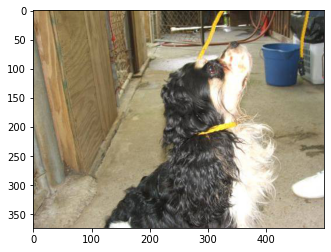

In [11]:
#Examples
img  = mpimg.imread('/content/train/dog.10017.jpg')
plt.imshow(img)

In [12]:
#Image Processing * Resizing *
!mkdir /content/Resized

mkdir: cannot create directory ‘/content/Resized’: File exists


In [21]:
files_names[3][:3]

'cat'

In [22]:
#Since we are using Transfer Learning we have to make the images match teh pre-trained model in our case MobileNetV2
#The Size should be (224,224)
#We resize the first 4000 Image (2000 images of cats / 2000 for dog )
countdog = 0
countcat = 0
for name in files_names:
  if ( countdog == 2000 and name[:3] == "dog") or ( countcat == 2000 and name[:3] == "cat" ) : 
    continue
  elif countdog == 2000 and countcat == 2000 : 
    break
  else:
    img  = Image.open('/content/train/'+name)
    img = img.resize((224,224))
    img = img.convert('RGB')
    img.save('/content/Resized/'+name)
  if name[:3] == "dog" :
    countdog += 1
  else : 
    countcat += 1

In [13]:
images_resized = os.listdir("/content/Resized/")
print("Total Training Data ",len(images_resized))
print("The Number of Cats Images ",len([ animal for animal in images_resized if animal.split(".")[0] == "cat"]))
print("The Number of Dogs Images ",len([ animal for animal in images_resized if animal.split(".")[0] == "dog"]))

Total Training Data  4000
The Number of Cats Images  2000
The Number of Dogs Images  2000


In [14]:
#Creating labels
#Cat --> 0 
# Dog --> 1
labels = [ 1 if animal.split(".")[0] == "dog" else 0 for animal in images_resized]

In [15]:
print(len(labels))
print(labels)

4000
[1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0

In [16]:
#Convert all images to numpy array
dogs_cats_train = np.asarray([cv.imread('/content/Resized/'+img) for img in images_resized])

In [17]:
print(dogs_cats_train.shape)

(4000, 224, 224, 3)


In [18]:
X = dogs_cats_train
Y = np.asarray(labels)

In [19]:
#Train Test split 
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,stratify=Y, test_size= 0.2 , random_state = 0)

In [20]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(4000, 224, 224, 3)
(3200, 224, 224, 3)
(800, 224, 224, 3)


In [21]:
#Scaling the data : take pixel values from 0-255 to 0-1 
X_train_scaled = X_train/255
X_test_scaled = X_test /255

In [22]:
#bUILDING The neural network
import tensorflow as tf 
import tensorflow_hub as hub 

In [23]:
pretrain_model  = hub.KerasLayer('https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4', input_shape=(224,224,3), trainable =False)

In [24]:
model = tf.keras.Sequential([
    pretrain_model,
    tf.keras.layers.Dense(2)
])
model.summary()

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [25]:
model.compile(optimizer = "adam" ,
              loss = tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['acc'])

In [26]:
model.fit(X_train_scaled,Y_train,epochs = 4)

Epoch 1/4
100/100 [==============================] - 119s 1s/step - loss: 0.5961 - acc: 0.9247
Epoch 2/4
100/100 [==============================] - 112s 1s/step - loss: 0.3671 - acc: 0.9678
Epoch 3/4
100/100 [==============================] - 113s 1s/step - loss: 0.4693 - acc: 0.9556
Epoch 4/4
100/100 [==============================] - 114s 1s/step - loss: 0.4711 - acc: 0.9575


In [27]:
loss , acc  = model.evaluate(X_test_scaled, Y_test)
print("Loss : ", loss)
print("Accuracy : ",acc)

25/25 [==============================] - 42s 2s/step - loss: 0.4852 - acc: 0.9525
Loss :  0.4852030575275421
Accuracy :  0.9524999856948853


Introduce the image path/content/test1/10.jpg


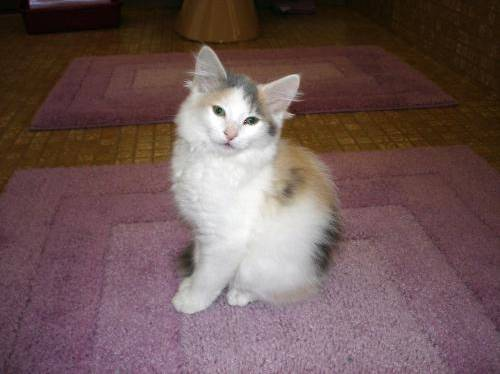

1/1 [==============================] - 0s 60ms/step
Image shows a cat


In [30]:
#System
img_path = input("Introduce the image path")
img = cv.imread(img_path)
cv2_imshow(img)
img = cv.resize(img,(224,224))
img_scaled = img/255
img_reshaped = np.reshape(img_scaled , [1,224,224,3])
prediction = model.predict(img_reshaped)
label = np.argmax(prediction)

if label == 0 : 
  print("Image shows a cat")
else : 
  print("Image shows a dog")